In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import ScalarFormatter, LogFormatter, NullFormatter
from matplotlib.ticker import MaxNLocator

In [2]:
helm_data = np.loadtxt('../comparison_data/helm_comparison.csv', delimiter=' ', usecols = (0, 1, 4))
ns_data = np.loadtxt('../comparison_data/ns_comparison.csv', delimiter=' ', usecols = (0, 1, 4))

print(helm_data.shape)
print(ns_data.shape)

name_arr = np.concatenate((np.array(['pca']*40), np.array(['deepo']*40), np.array(['para']*35), np.array(['fno']*40)))

helm_data = np.concatenate((helm_data, name_arr.reshape(-1, 1)), axis=1)
ns_data = np.concatenate((ns_data, name_arr.reshape(-1, 1)), axis=1)

print(helm_data.shape)
print(ns_data.shape)

helm_data = pd.DataFrame(helm_data, columns=['N_train', 'size', 'error', 'model'])
ns_data = pd.DataFrame(ns_data, columns=['N_train', 'size', 'error', 'model'])

helm_data['error'] = helm_data['error'].astype(float)
ns_data['error'] = ns_data['error'].astype(float)
helm_data['N_train'] = helm_data['N_train'].astype(float).astype(int)
ns_data['N_train'] = ns_data['N_train'].astype(float).astype(int)
helm_data['size'] = helm_data['size'].astype(float).astype(int)
ns_data['size'] = ns_data['size'].astype(float).astype(int)

(155, 3)
(155, 3)
(155, 4)
(155, 4)


In [58]:
helm_20 = [0.1388, 0.1199, 0.1045, 0.09687]
helm_50 = [0.1405, 0.1307, 0.10487, 0.09319]
ns_20 = [0.2651, 0.2384, 0.2293, 0.22693]
ns_50 = [0.10496, 0.08956, 0.07852, 0.07382]

ns_uncert_data = [1.6616, 1.9543, 2.4029, 2.3902]
helm_uncert_data = [1.626, 1.5902, 1.5411, 1.4727]

our_data = {20:{'helm': helm_20, 'ns': ns_20}, 50:{'helm': helm_50, 'ns': ns_50}}

[0.1405, 0.1307, 0.10487, 0.09319]
[0.10496, 0.08956, 0.07852, 0.07382]


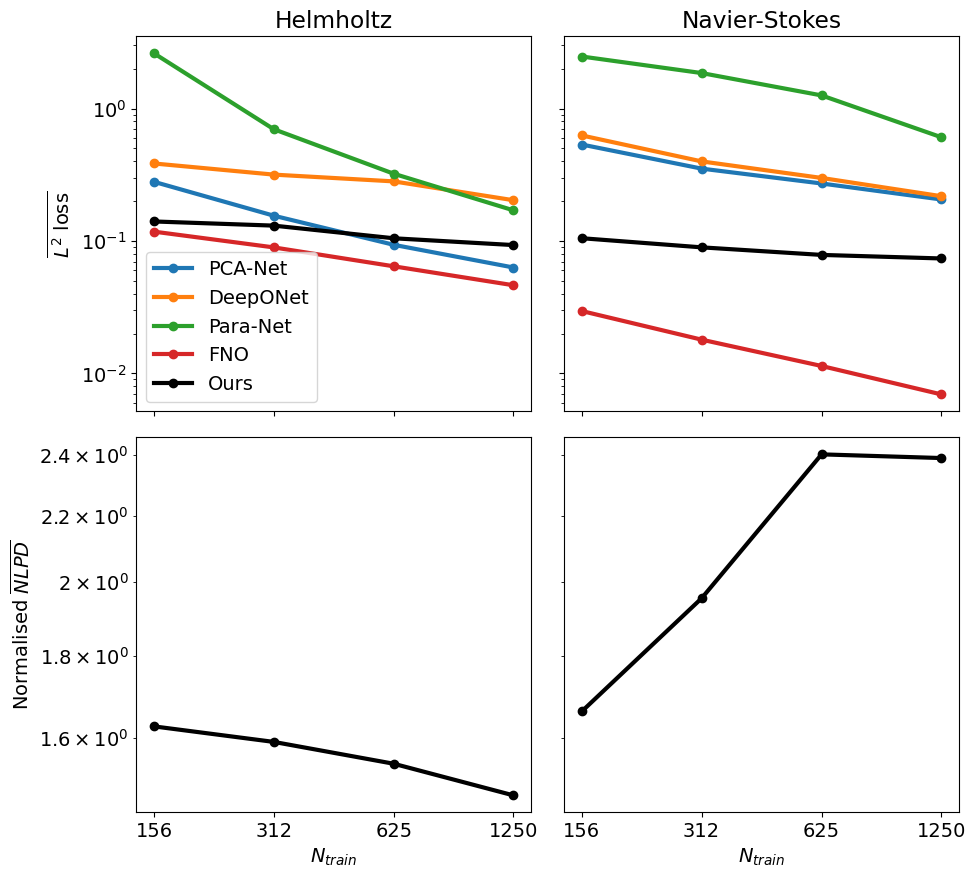

In [63]:
plt.rcParams["lines.linewidth"] = 3
plt.rcParams["font.size"] = 14

N_train = [156, 312, 625, 1250]
size_l = [256]
df_l = [16]
nm_l = [50]
problems = ['helm', 'ns']
models = ['pca', 'deepo', 'para', 'fno', 'ours']

fig, ax = plt.subplots(2, 2, figsize=(10, 9), sharex=True, sharey='row')
for l, metric in enumerate(['loss', 'uncertainty']):
    for i in range(len(size_l)):
        for j in range(len(problems)):
            
            for k, model in enumerate(models):
                if problems[j] == 'helm':
                    data = helm_data
                else:
                    data = ns_data
                
                data = data[data['model'] == model]

                if metric == 'loss':
                    if model == 'ours':
                        print(our_data[nm_l[i]][problems[j]])
                        ax[l, j].plot(N_train, our_data[nm_l[i]][problems[j]], label = model, marker = 'o', ms = 6, color='black')
                    if model == 'fno':
                        data = data[data['size'] == df_l[i]]
                        ax[l, j].plot(data['N_train'][:4], data['error'][:4], label = model, marker = 'o', ms = 6)
                    else:
                        data = data[data['size'] == size_l[i]]
                        ax[l, j].plot(data['N_train'][:4], data['error'][:4], label = model, marker = 'o', ms = 6)
                else:
                    if model == 'ours':
                        if problems[j] == 'helm':
                            uncer = helm_uncert_data
                            ax[l, j].plot(N_train, uncer, label = model, marker = 'o', ms = 6, color='black')
                        else:
                            uncer = ns_uncert_data
                            ax[l, j].plot(N_train, uncer, label = model, marker = 'o', ms = 6, color='black')
                        
            
            ax[l, j].set_yscale('log')
            ax[l, j].set_xscale('log')
            ax[l, j].xaxis.set_major_formatter(NullFormatter())
            ax[l, j].xaxis.set_minor_formatter(NullFormatter())
            # ax[j, i].xaxis.set_major_locator(MaxNLocator(integer=True))
            ax[l, j].set_xticks([])
            ax[l, j].set_xticks(N_train)
            # print([str(n) for n in N_train])
            ax[l, j].set_xticklabels([str(n) for n in N_train])
            ax[l, j].tick_params(axis='x', which='minor', bottom=False)
            # ax[j, i].yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
            # ax[j, i].yaxis.get_major_formatter().set_scientific(False)
            # ax[j, i].yaxis.get_major_formatter().set_useOffset(False)
        
ax[0, 0].set_title('Helmholtz')
ax[0, 1].set_title('Navier-Stokes')
        
ax[1, 0].set_xlabel(r'$N_{train}$')
ax[1, 1].set_xlabel(r'$N_{train}$')
ax[0, 0].set_ylabel(r'$\overline{L^2\ \text{loss}}$')
ax[1, 0].set_ylabel(r'Normalised $\overline{NLPD}$')

ax[0, 0].legend(['PCA-Net', 'DeepONet', 'Para-Net', 'FNO', 'Ours'])

plt.tight_layout()
plt.savefig('../figures/data_efficiency.pdf')
plt.show()